In [183]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import requests
from urllib.parse import urlencode

%matplotlib inline

In [184]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key_items = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'
public_key_orders = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
public_key_customers = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
 
# получаем url 
final_url_items = base_url + urlencode(dict(public_key=public_key_items)) 
response_items = requests.get(final_url_items) 
download_url_items = response_items.json()['href']

final_url_orders = base_url + urlencode(dict(public_key=public_key_orders)) 
response_orders = requests.get(final_url_orders) 
download_url_orders = response_orders.json()['href'] 

final_url_customers = base_url + urlencode(dict(public_key=public_key_customers)) 
response_customers = requests.get(final_url_customers) 
download_url_customers = response_customers.json()['href'] 
 
# загружаем файлы в df 
download_response_items = requests.get(download_url_items) 
items = pd.read_csv(download_url_items) 

download_response_orders = requests.get(download_url_orders) 
orders = pd.read_csv(download_url_orders)

download_response_customers = requests.get(download_url_customers) 
customers = pd.read_csv(download_url_customers)

In [185]:
# Визуальный взгляд на верхние строки датафреймов
items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [186]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [187]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Анализ таблицы заказов для определения того, что считать покупкой

1. Покупка точно должна быть оплачена и доставлена, так как если товар еще не доставлен, то клиент может отказаться от него, а, значит, покупка может уйти в статус не совершенных (хотя таким образом мы отсечем текущие заказы, находящиеся в процессе на каком-то из этапов, и все же предпочтем не считать их уже совершенной покупкой)

In [190]:
# Отфильтровывание оплаченых и доставленых покупок и информация по полям
orders.query('order_status == "delivered" & order_purchase_timestamp.notna()').info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


2. Также у нас в датафрейме есть колонки с подтверждением оплаты и временем доставки заказа. В наших данных есть нули в этих столбцах в заказах, где статус указан "доставлено". Будь это реальная задача, я бы уточнил у коллег информацию об этих заказах (заказы действительно доставлены, но не встали данные по оплате и дате доставки? или заказы не оплачены/не доставлены на самом деле, а ошибка в статусе заказа?), но сейчас уберем эти заказы из выборки, как спорные, тем более таких позиций совсем немного

In [192]:
# Проверяем, что не осталось спорных нулей
orders.query('order_status == "delivered" & order_purchase_timestamp.notna()' \
             '& order_approved_at.notna() & order_delivered_customer_date.notna()' \
             '& order_delivered_carrier_date.notna()').info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [193]:
# Cохраняем итог в отдельную переменную "покупки"
purchases = orders.query('order_status == "delivered" & order_purchase_timestamp.notna()' \
             '& order_approved_at.notna() & order_delivered_customer_date.notna()' \
             '& order_delivered_carrier_date.notna()')

# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [195]:
# Мерджим датафрейм покупок с покупателями, откуда можем вытащить уникальные айди покупателей
purchases = purchases.merge(customers, on = 'customer_id', how='left')

In [196]:
# Группируем данные по уникальным айди, 
# считаем количество покупок 
# и отфильтровываем только тех пользователей, которые совершили одну покупку
purchases.groupby('customer_unique_id', as_index=False) \
         .agg({'order_status' : 'count'}) \
         .rename(columns={'order_status' : 'orders'}) \
         .query('orders == 1').shape[0]

90536

# Ответ на задачу 1 

90 536 пользователей совершили лишь одну покупку (с учетом отфильтровывания спорных позиций с нулями в некоторых колонках, без фильтрации было бы чуть больше, так как были строки со статусом "доставлено", но есть сомнительные нули, которые я, просто смотря на данные, не знаю как интерпретировать)

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [200]:
# Какие вообще бывают статусы заказов
orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Кажется, под не доставленными можно понимать отмененные и недоступные заказы. Также нам надо перевести колонки с датой в формат даты вместо строкового (мы увидели это при вызове инфо по датафреймам)

In [202]:
# Переводим все колонки с датой в формат timestamp
orders[['order_purchase_timestamp', 'order_delivered_carrier_date', 
        'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_approved_at']] = \
    orders[['order_purchase_timestamp', 'order_delivered_carrier_date', 
        'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_approved_at']] \
    .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

In [203]:
# Создаем отдельную колонку в формате год-месяц для группировки
orders['Month_Year'] = orders['order_estimated_delivery_date'].dt.to_period('M')

# Ответ на задачу 2

In [205]:
# Расчет среднего количество отмененных и недоступных заказов
orders.query('order_status == "canceled" or order_status == "unavailable"') \
      .groupby(['Month_Year', 'order_status'], as_index=False) \
      .agg({'order_id' : 'count'}) \
      .groupby('order_status', as_index=False) \
      .agg({'order_id' : 'mean'}) \
      .rename(columns={'order_id' : 'mean_orders'})

,order_status,mean_orders
0,canceled,24.038462
1,unavailable,29.000000


Отмененных заказов - 24 \
Недоступных - 29 \
В среднем в месяц

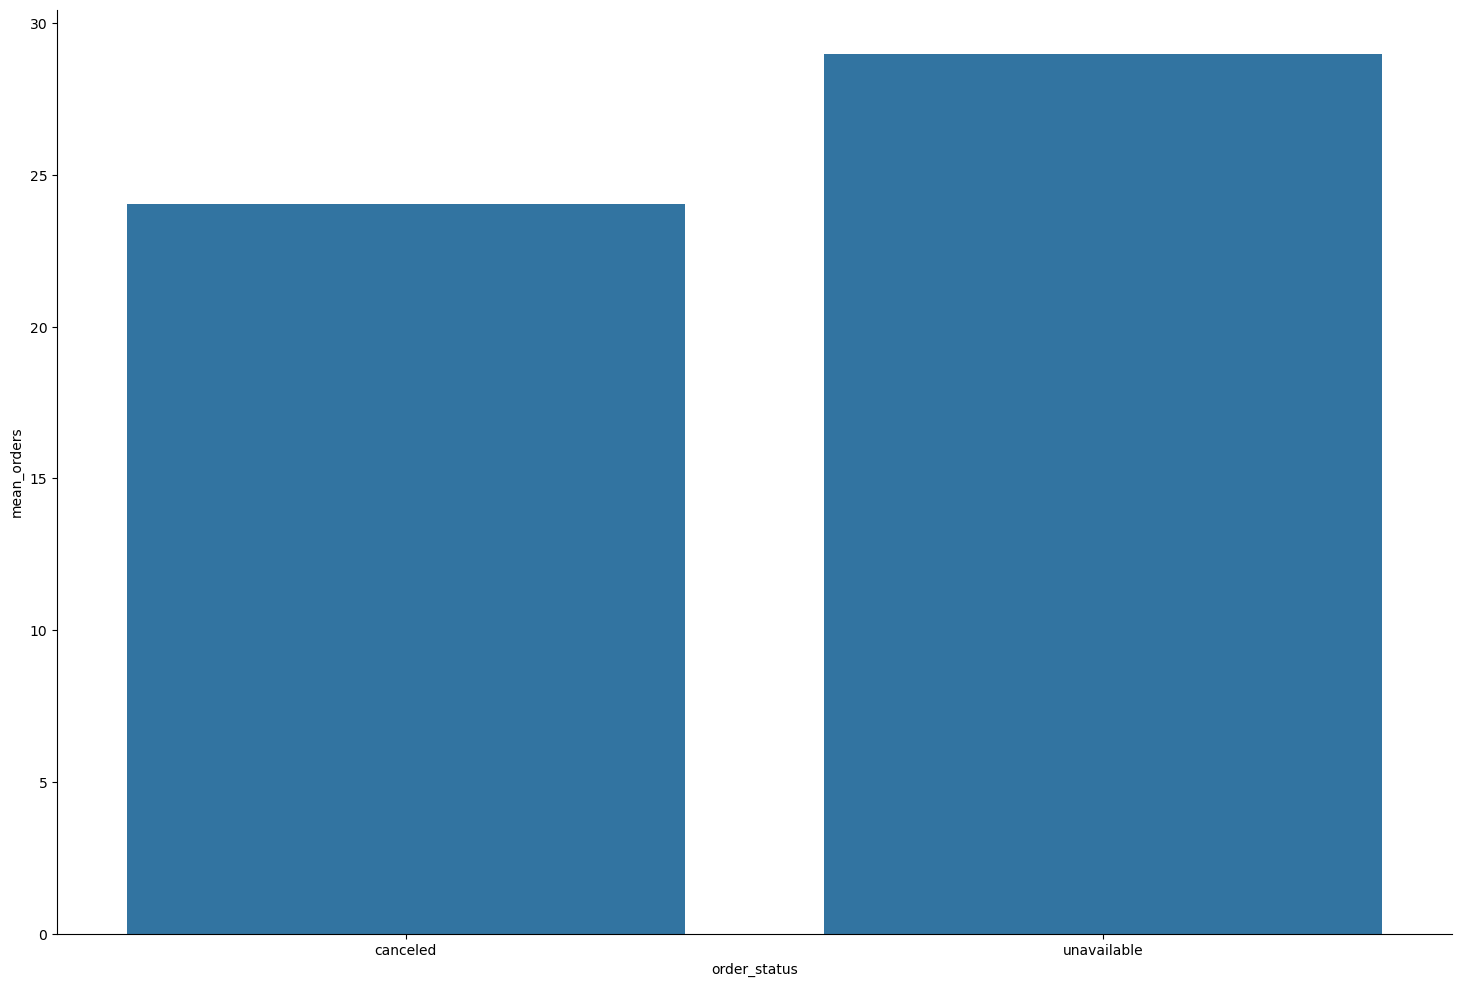

In [207]:
# Детализация по причинам на графике
not_delivered = orders.query('order_status == "canceled" or order_status == "unavailable"') \
      .groupby(['Month_Year', 'order_status'], as_index=False) \
      .agg({'order_id' : 'count'}) \
      .groupby('order_status', as_index=False) \
      .agg({'order_id' : 'mean'}) \
      .rename(columns={'order_id' : 'mean_orders'})

fig = plt.figure(figsize=(18,12))

sns.barplot(x=not_delivered['order_status'],y=not_delivered['mean_orders'],data=not_delivered)
sns.despine()
plt.show()

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [209]:
# Мерджим датафрейм заказов с датафреймом товаров
orders_items = orders.merge(items, on='order_id', how='outer')

In [210]:
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month_Year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-02,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017-03,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [211]:
# Создаем колонку с днями недели покупки
orders_items['day_of_purchase'] = orders_items['order_purchase_timestamp'].dt.day_name()

In [212]:
# Группируем по товарам и дня недели, подсчитываем под каждый товар количество заказов по дням недели
# Сортируем по количеству заказов и оставляем строки с самым большим количеством заказов

orders_items.groupby(['product_id', 'day_of_purchase'], as_index=False) \
            .agg({'order_purchase_timestamp' : 'count'}) \
            .rename(columns={'order_purchase_timestamp' : 'orders'}) \
            .sort_values(['product_id', 'orders'], ascending=(True , False)) \
            .groupby('product_id', as_index=False).first() \
            .rename(columns={'day_of_purchase' : 'most_purchases_day'})

,product_id,most_purchases_day,orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
32948,fff9553ac224cec9d15d49f5a263411f,Friday,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


Однако по данным кажется, что есть товары, которые по разу покупались в разные дни (очень много единиц, как максимальных сумм покупок товаров в день)

# Ответ на задачу 3

In [215]:
orders_by_product = orders_items.groupby(['product_id', 'day_of_purchase'], as_index=False) \
            .agg({'order_purchase_timestamp' : 'count'}) \
            .rename(columns={'order_purchase_timestamp' : 'orders'}) \
            .sort_values(['product_id', 'orders'], ascending=(True , False))

In [216]:
max_orders_by_product = orders_items.groupby(['product_id', 'day_of_purchase'], as_index=False) \
            .agg({'order_purchase_timestamp' : 'count'}) \
            .rename(columns={'order_purchase_timestamp' : 'orders'}) \
            .sort_values(['product_id', 'orders'], ascending=(True , False)) \
            .groupby('product_id', as_index=False).first() \
            .rename(columns={'day_of_purchase' : 'most_purchases_day', 'orders' :'max_orders'})

In [217]:
# добавляем колонку с максимальным числом покупок для каждого товара, 
# чтобы потом сраванивать значение по строке с максимальным
max_orders_by_product = orders_by_product.merge(max_orders_by_product, on='product_id', how='left')
max_orders_by_product.head()

,product_id,day_of_purchase,orders,most_purchases_day,max_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1,Friday,1


In [218]:
# отфильтровываем только те дни, где число заказов равно максимальному
# группируем по товару и джойним дни недели, где число покупок максимально
max_orders_by_product.query('orders >= max_orders') \
                     .groupby('product_id', as_index= False ) \
                     .agg({'day_of_purchase': ', '. join }) \
                     .rename(columns={'day_of_purchase' : 'most_purchases_days'})

,product_id,most_purchases_days
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"Friday, Wednesday"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"Saturday, Sunday"
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


На сей раз, кажется, все верно, в таблице указаны несколько самых популярных дней, если значения по ним максимальны и равны друг другу

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

У нас уже смерджен датафрейм покупок и пользователей, будем работать с ним

In [222]:
# Но не переведены даты в верный формат
purchases[['order_purchase_timestamp', 'order_delivered_carrier_date', 
        'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_approved_at']] = \
    purchases[['order_purchase_timestamp', 'order_delivered_carrier_date', 
        'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_approved_at']] \
    .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

In [223]:
# создаем колонку с месяцем и годом покупки
purchases['order_month'] = purchases.order_purchase_timestamp.dt.to_period('M')

In [224]:
# все на месте
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


Далее надо сгруппировать датафрейм по пользователям, посчитать количество покупок в месяц и разделить количество покупок на количество недель в конкретном месяце

In [226]:
# Группируем и считаем количество заказов по месяцам
purchases_by_month = purchases.groupby(['customer_unique_id', 'order_month'], as_index=False) \
         .agg({'order_id' : 'count'}) \
         .rename(columns={'order_id' : 'orders'})

In [227]:
# Создаем колонку со средним количеством покупок в неделю по каждому месяцу
purchases_by_month['mean_by_week'] = purchases_by_month.orders / (purchases_by_month.order_month.dt.days_in_month / 7)

In [228]:
# Проверяем, что получилось
purchases_by_month.head()

,customer_unique_id,order_month,orders,mean_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,0.233333


# Ответ на задачу 4

Осталось снова сгруппировать данные по пользователям, чтобы получить их среднее количество покупок в неделю по всем месяцам, когда они совершали покупку

In [231]:
# Группируем и находим среднее по закупкам в неделю для каждого пользователя
purchases_by_month.groupby('customer_unique_id', as_index=False) \
                  .agg({'mean_by_week' : 'mean'})

,customer_unique_id,mean_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.225806
2,0000f46a3911fa3c0805444483337064,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,0.225806
4,0004aac84e0df4da2b147fca70cf8255,0.233333
...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,0.233333
93332,fffea47cd6d3cc0a88bd621562a9d061,0.225806
93333,ffff371b4d645b6ecea244b27531430a,0.250000
93334,ffff5962728ec6157033ef9805bacc48,0.225806


Получившаяся таблица является ответом на поставленный вопрос

# 5.1. Выполните когортный анализ пользователей.

5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. Для визуализации когортной таблицы рекомендуем использовать пример из 8-го урока python, раздел “Стильный урок”, степ 5. (15 баллов)

In [234]:
# Смотрим какой промежуток во времени у данных в нашем датафйреме
purchases.sort_values('order_month').order_month.unique()

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08']
Length: 23, dtype: period[M]

В задании требуется составить когорты с января по декабрь, поэтому оставляем данные за 2017 год

In [236]:
purchases_year = purchases.query('"2017-01" <= order_month <= "2017-12"')

In [237]:
purchases_year.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,2017-01


In [238]:
# Составляем таблицу с датой первой покупки клиентом
# Возвращаемся тут к общей таблице покупок, чтобы не пропустить клиентов
# первые покупки которых были ранее 2017 года
first_orders = purchases.groupby('customer_unique_id', as_index=False) \
              .agg({'order_month' : 'min'}) \
              .rename(columns={'order_month' : 'first_order'})
first_orders.head()

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [239]:
# Мерджим новую таблицу с таблицей покупок в 17 году
purchases_year = purchases_year.merge(first_orders, on = 'customer_unique_id', how='left')
purchases_year.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07,2017-07
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05,2017-05
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,2017-01,2017-01


In [240]:
# Начинаем формировать таблицу с когортами, сначала группируем 
# по первому заказу и остальным заказам и считаем количество
# уникальных покупателей и оставляем только нужный нам год
cohorts = purchases_year.groupby(['first_order', 'order_month'], as_index=False) \
              .agg({'customer_unique_id' : 'nunique'}) \
              .query('"2017-01" <= first_order <= "2017-12" & "2017-01" <= order_month <= "2017-12"')
cohorts.head()

,first_order,order_month,customer_unique_id
5,2017-01,2017-01,715
6,2017-01,2017-02,2
7,2017-01,2017-03,2
8,2017-01,2017-04,1
9,2017-01,2017-05,3


In [241]:
# Добавляем столбик с количеством месяцев между покупками для нашего когортного анализа
cohorts['months'] = cohorts.order_month.dt.month - cohorts.first_order.dt.month
cohorts.head()

,first_order,order_month,customer_unique_id,months
5,2017-01,2017-01,715,0
6,2017-01,2017-02,2,1
7,2017-01,2017-03,2,2
8,2017-01,2017-04,1,3
9,2017-01,2017-05,3,4


In [242]:
# Делаем сводную таблицу по месяцам для визуализации когорт
cohorts = cohorts.pivot(index='first_order', columns='months', values='customer_unique_id')
cohorts

months,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-01,715.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0
2017-02,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN,NaN
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3450.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3752.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4003.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
# Переведем данные в доли

cohorts = cohorts.divide(cohorts.iloc[:,0], axis = 0)
cohorts

months,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-01,1.0,0.002797,0.002797,0.001399,0.004196,0.001399,0.004196,0.001399,0.001399,NaN,0.004196,0.001399
2017-02,1.0,0.001856,0.003094,0.001238,0.004332,0.001238,0.002475,0.001856,0.000619,0.001856,0.001238,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,NaN,NaN
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,NaN,NaN,NaN
2017-05,1.0,0.004638,0.004638,0.002899,0.002899,0.003188,0.004058,0.001449,NaN,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005330,0.003465,0.002399,0.002932,0.002132,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006902,0.003451,0.002711,0.003451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006995,0.005496,0.002748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# Приводим к данные к стилю из примера

ur_style = (cohorts
            .style
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

months,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-01,100.00%,0.28%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.42%,0.14%
2017-02,100.00%,0.19%,0.31%,0.12%,0.43%,0.12%,0.25%,0.19%,0.06%,0.19%,0.12%,
2017-03,100.00%,0.44%,0.36%,0.40%,0.36%,0.16%,0.16%,0.32%,0.32%,0.08%,,
2017-04,100.00%,0.62%,0.22%,0.18%,0.27%,0.27%,0.35%,0.31%,0.31%,,,
2017-05,100.00%,0.46%,0.46%,0.29%,0.29%,0.32%,0.41%,0.14%,,,,
2017-06,100.00%,0.49%,0.40%,0.43%,0.30%,0.40%,0.36%,,,,,
2017-07,100.00%,0.53%,0.35%,0.24%,0.29%,0.21%,,,,,,
2017-08,100.00%,0.69%,0.35%,0.27%,0.35%,,,,,,,
2017-09,100.00%,0.70%,0.55%,0.27%,,,,,,,,


Большинство пользователей совершают лишь одну покупку, поэтому ретеншн на каждом этапе очень мал, нет даже ни одного значения выше 1%

# Ответ на задачу 5

Наибольший ретеншн на 3 месяц у пользователей с первым заказом в марте 2017. Значение равно 0,47% и выделяется в том числе и по цвету после редактирования оформления

# 6. RFM сегментация

Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Для этого возвращаемся к нашим данным с покупками

In [251]:
# Посмотрим минимальную дату

purchases.order_purchase_timestamp.min()

Timestamp('2016-09-15 12:16:38')

In [252]:
# И максимальную

purchases.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

In [253]:
# Текущей будем считать следующий день после последнего в данных

now = timedelta(days=1) + purchases.order_purchase_timestamp.max()
now

Timestamp('2018-08-30 15:00:37')

### Расчет RFM по пользователям

In [255]:
# Создаем колонку с количеством дней с момента покупки

purchases['days_since_order'] = orders['order_purchase_timestamp'].apply(lambda x: (now - x).days)
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month,days_since_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,332
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,36
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,284
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,197


In [256]:
# В данных с ценами товаров достаем стоимость каждого заказа

prices = items.groupby('order_id', as_index=False).agg({'price' : 'sum'})
prices.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [257]:
# Добавляем данные по стоимости в данные с заказами

purchases = purchases.merge(prices, on = 'order_id', how='left')
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month,days_since_order,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,332,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,36,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,22,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,284,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,197,19.90


In [258]:
# Рассчитываем метрики рфм по пользователям

rfm = purchases.groupby('customer_unique_id', as_index=False).agg({
    'days_since_order': lambda x: x.min(), 
    'order_approved_at': 'count',
    'price' : 'sum'})
rfm.rename(columns={'days_since_order': 'recency', 'order_approved_at': 'frequency', 'price' : 'monetary'}, inplace=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,278,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,279,1,18.90
2,0000f46a3911fa3c0805444483337064,444,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,533,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,67,1,180.00


In [259]:
# Смотрим на квантили распределения по метрикам по 20%

rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8])

,recency,frequency,monetary
0.2,93.0,1.0,39.9
0.4,178.0,1.0,69.9
0.6,269.0,1.0,109.9
0.8,384.0,1.0,179.9


По частоте покупок, как мы уже помним большинство пользователей совершили лишь одну покупку, надо посмотреть распределение внимательнее. Учитывая данные, мне кажется сегментировать пользователей на 5 групп по каждому параметру может быть излишним

Может попробовать сделать меньше сегментов, постараться отделить крайние значения в обе стороны и также разделить пользователей в середине на два сегмента

In [262]:
# Помотрим на квантили распределения по метрикам отделив 10% пользователей с каждой стороны

rfm[['recency', 'monetary']].quantile([.1, .5, .9])

,recency,monetary
0.1,42.0,25.98
0.5,219.0,89.70
0.9,467.0,279.99


Можем взять эти данные по R и M для разделения

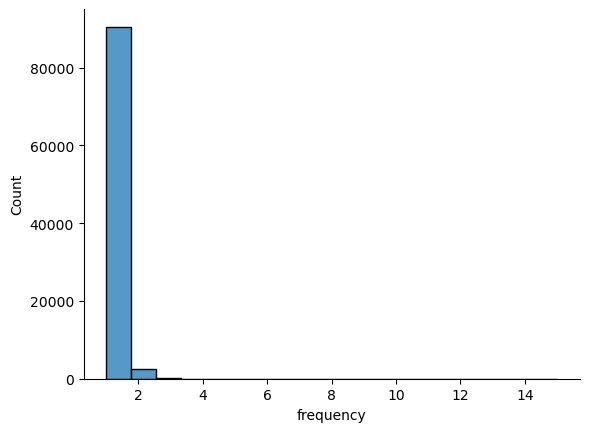

In [264]:
# Посмотрим распределение частоты покупок

sns.histplot(rfm.frequency)
sns.despine()
plt.show()

Количество покупателей всего с 1 покупкой слишком большое и перевешивает остальные значения

In [266]:
# Посмотрим распределение числами, а не на графике

rfm.frequency.value_counts()

frequency
1     90536
2      2572
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

1. Покупатели с одной покупкой точно будут в отдельной сегменте 
2. Дальше мы также можем отделить покупателей с 2-мя покупками, и этот сегмент будет вторым по размеру
3. В следующий сегмент можно включить людей с 3-4 покупками
4. В последний сегменте будут люди больше, чем с 4 покупками (очень малое количество покупателей)

In [268]:
quintiles = rfm[['recency', 'monetary']].quantile([.1, .5, .9]).to_dict()

In [269]:
# Создаем функции для распределения пользователей по сегментам
# Для R и M по квантилям
# Для F согласно тому, что увидели в данных и расписали выше

def r_score(x):
    if x <= quintiles['recency'][.1]:
        return 4
    elif x <= quintiles['recency'][.5]:
        return 3
    elif x <= quintiles['recency'][.9]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['monetary'][.1]:
        return 1
    elif x <= quintiles['monetary'][.5]:
        return 2
    elif x <= quintiles['monetary'][.9]:
        return 3
    else:
        return 4
    

def f_score(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 4:
        return 3
    else:
        return 4

In [270]:
# Создаем колонки исполняя созданные функции

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [271]:
# Создаем объединенную колонку RFМ с полной сегментацией пользователей

rfm['RFM'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,278,1,129.90,2,1,3,213
1,0000b849f77a49e4a4ce2b2a4ca5be3f,279,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,444,1,69.00,2,1,2,212
3,0000f6ccb0745a6a4b88665a16c9f078,533,1,25.99,1,1,2,112
4,0004aac84e0df4da2b147fca70cf8255,67,1,180.00,3,1,3,313


# Ответ на задачу 6

### Recency

Определили сегменты по квантилям

1. Пользователи с покупками позднее 467 дней
2. Пользователи с последней покупкой в диапозоне от 219 до 467 дней
3. Пользователи с последней покупкой в диапозоне от 42 до 219 дней
4. Пользователи с последней покупкой, совершенной не более 42 дней назад

### Frequency

Определили сегменты согласно частоте распределения покупок, так как у большинства пользователей лишь одна покупка

1. Пользователи с 1-ой покупкой
2. Пользователи с 2-мя покупками
3. Пользователи с 3-мя и 4-мя покупками
4. Пользователи с более, чем 4-мя покупками

### Monetary

Определили сегменты по квантилям

1. Пользователи потратившие не более 25.98
2. Пользователи потратившие в диапозоне от 25.99 до 89.70
3. Пользователи потратившие в диапозоне от 89.71 до 279.99
4. Пользователи потратившие 280 и больше

## Визуализация пользователей по сегментам

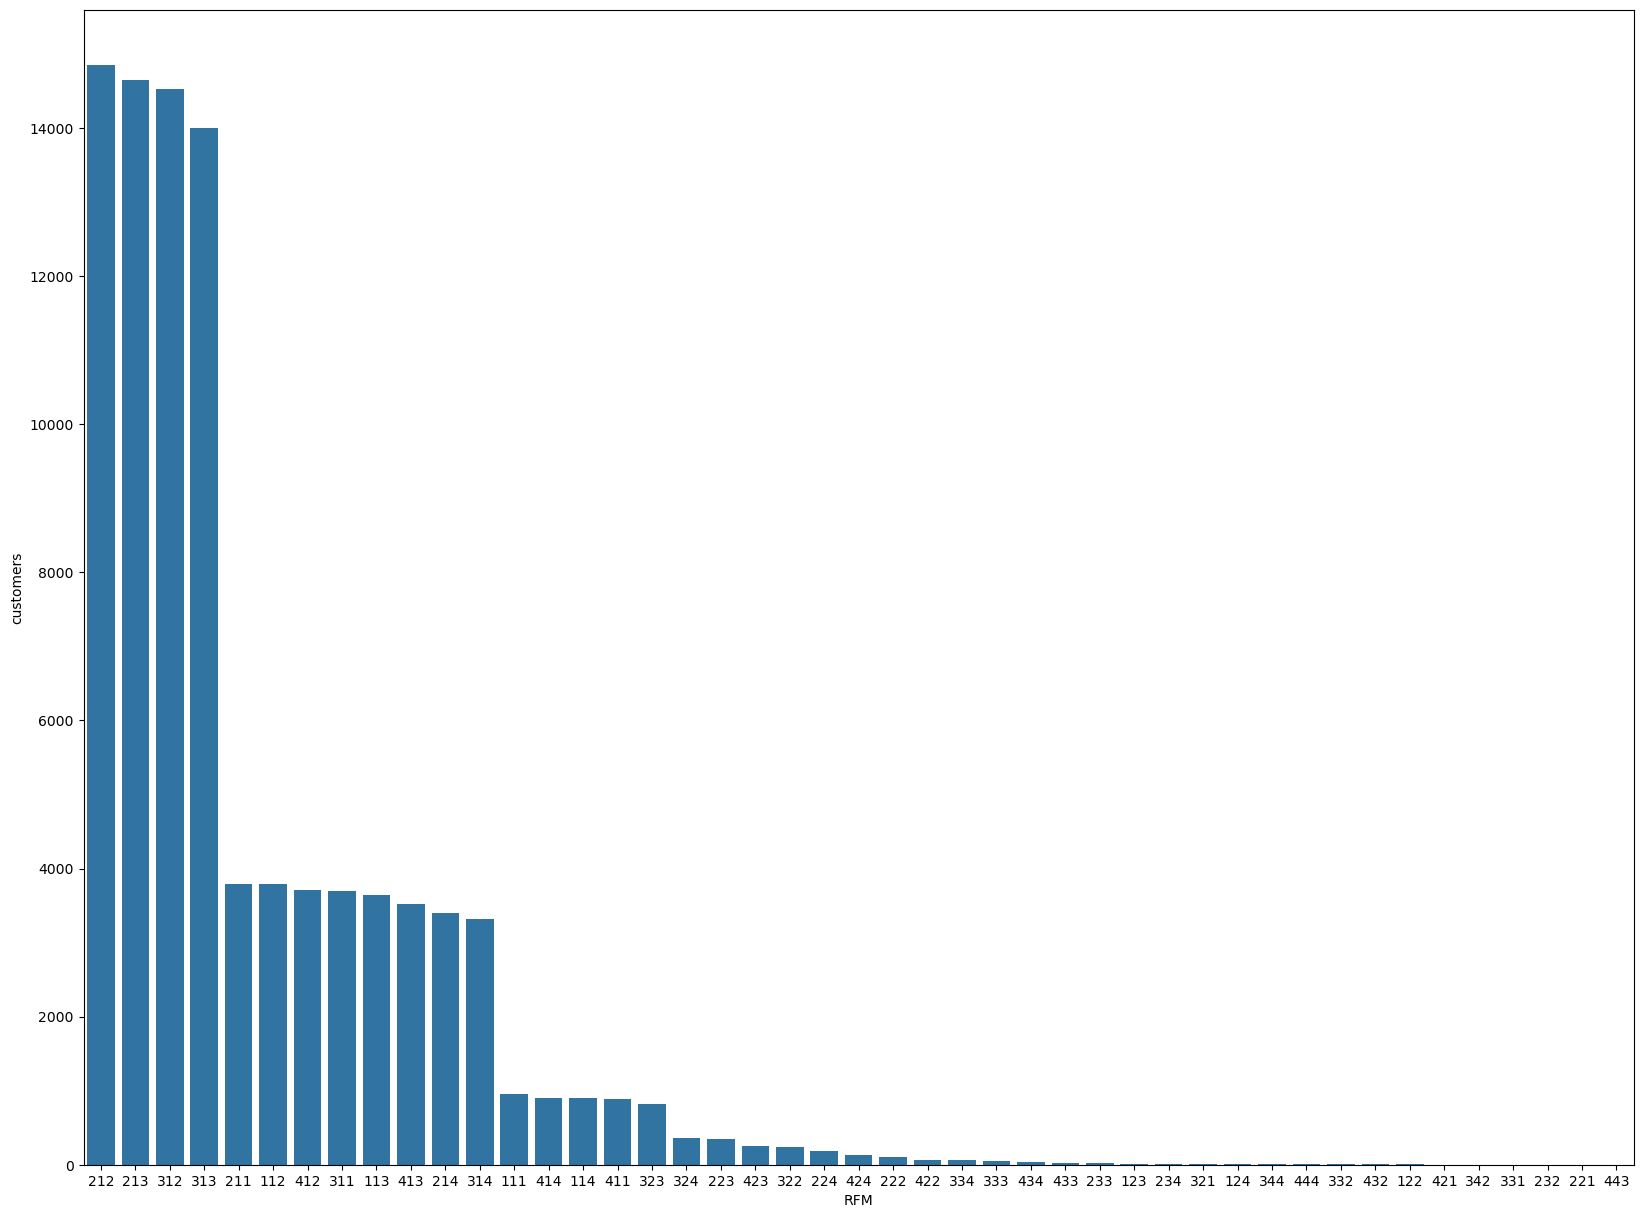

In [283]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.barplot(data = rfm.groupby('RFM', as_index = False) \
                      .agg({'customer_unique_id' : 'count'}) \
                      .rename(columns = {'customer_unique_id' : 'customers'}) \
                      .sort_values('customers', ascending = False) , 
                    x = 'RFM', 
                    y = 'customers')
plt.show ()

Основные сегменты, в которые попадают покупатели это: 212, 213, 312 и 313\
Это говорит о том, что они совершали свою покупку достаточно давно, она была единственной для них и средний чек в этой покупке небольшой (от 25.99 до 279.99)\
Пользователи с более чем одной покупкой встречаются редко, аналогично обстоят дела и с размером чека (ползователей с большими тратами мало)